# **Import TensorFlow and other libraries**

In [ ]:
import tensorflow as tf
import numpy as np
import os
import PIL
from tensorflow.keras import datasets, layers, models
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense, Activation, Dropout

from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import normalize
from sklearn.preprocessing import OneHotEncoder
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

# Loading and Process CIFAR-100 dataset

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

169017344/169001437 [==============================] - 2s 0us/step


In [ ]:
train_images.shape, train_labels.shape, test_images.shape, test_labels.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
to_categorical(train_labels)[0, :].shape # number of categories

(100,)

In [ ]:
train_images[0, :].shape # image shape

(32, 32, 3)

In [ ]:
train_images.shape[1:]

(32, 32, 3)

# Implementing CNN model

In [ ]:
num_classes = 100

model = Sequential()
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(Conv2D(16, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))



In [17]:
optimizer = Adam(lr=0.0001)
encode = OneHotEncoder(sparse=False)
encode.fit(train_labels)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

history = model.fit(train_images/255., encode.transform(train_labels), epochs=15, batch_size=8,
          validation_data=(test_images/255., encode.transform(test_labels)))

model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
6250/6250 [==============================] - 182s 29ms/step - loss: 2.0591 - acc: 0.4427 - val_loss: 2.2613 - val_acc: 0.4212
Epoch 2/15
6250/6250 [==============================] - 183s 29ms/step - loss: 2.0277 - acc: 0.4494 - val_loss: 2.2349 - val_acc: 0.4251
Epoch 3/15
6250/6250 [==============================] - 185s 30ms/step - loss: 1.9950 - acc: 0.4586 - val_loss: 2.2364 - val_acc: 0.4250
Epoch 4/15
6250/6250 [==============================] - 184s 29ms/step - loss: 1.9791 - acc: 0.4594 - val_loss: 2.2510 - val_acc: 0.4249
Epoch 5/15
6250/6250 [==============================] - 185s 30ms/step - loss: 1.9645 - acc: 0.4625 - val_loss: 2.2106 - val_acc: 0.4337
Epoch 6/15
6250/6250 [==============================] - 187s 30ms/step - loss: 1.9602 - acc: 0.4645 - val_loss: 2.2307 - val_acc: 0.4301
Epoch 7/15
6250/6250 [==============================] - 187s 30ms/step - loss: 1.9451 - acc: 0.4675 - val_loss: 2.2364 - val_acc: 0.4243
Epoch 8/15
6250/6250 [===================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


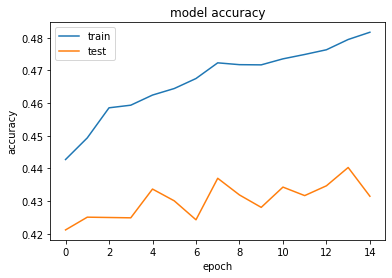

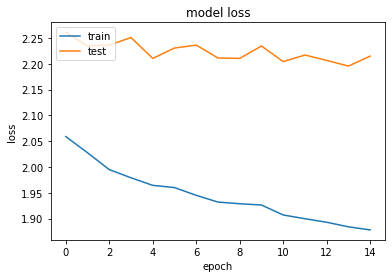

In [18]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Implementing 3 VGG model with Data augmentation and dropout techniques 

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(train_images.shape[1:])),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [19]:
num_classes = 100

model = Sequential()
data_augmentation
#model.add(experimental.preprocessing.Rescaling(1./255))
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.3))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(Conv2D(128, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

optimizer = Adam(lr=0.0001)
encode = OneHotEncoder(sparse=False)
encode.fit(train_labels)

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])

history = model.fit(train_images/255., encode.transform(train_labels), epochs=15, batch_size=8,
          validation_data=(test_images/255., encode.transform(test_labels)))

model.summary()

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
6250/6250 [==============================] - 182s 29ms/step - loss: 4.3498 - acc: 0.0400 - val_loss: 3.9848 - val_acc: 0.0986
Epoch 2/15
6250/6250 [==============================] - 186s 30ms/step - loss: 3.9157 - acc: 0.0983 - val_loss: 3.7052 - val_acc: 0.1504
Epoch 3/15
6250/6250 [==============================] - 185s 30ms/step - loss: 3.6690 - acc: 0.1379 - val_loss: 3.4933 - val_acc: 0.1884
Epoch 4/15
6250/6250 [==============================] - 188s 30ms/step - loss: 3.4668 - acc: 0.1738 - val_loss: 3.2425 - val_acc: 0.2300
Epoch 5/15
6250/6250 [==============================] - 190s 30ms/step - loss: 3.3049 - acc: 0.2026 - val_loss: 3.0928 - val_acc: 0.2574
Epoch 6/15
6250/6250 [==============================] - 196s 31ms/step - loss: 3.1669 - acc: 0.2270 - val_loss: 3.0206 - val_acc: 0.2643
Epoch 7/15
6250/6250 [==============================] - 201s 32ms/step - loss: 3.0601 - acc: 0.2475 - val_loss: 2.8738 - val_acc: 0.2944
Epoch 8/15
6250/6250 [===================

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


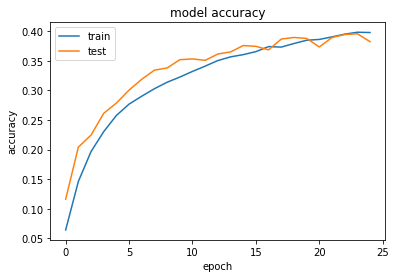

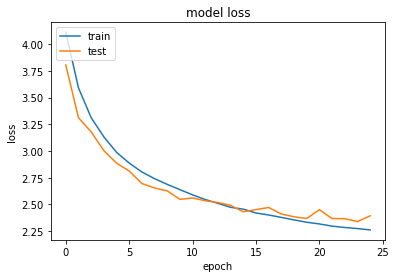

In [16]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()